# Exemples de reconstruction de la forme d'un visage à partir de photographies


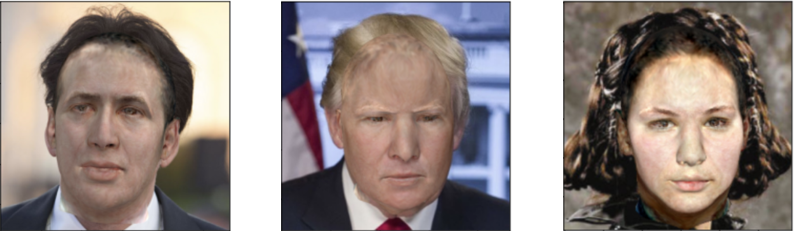

Ce notebook illustre des résultats de notre project de reconstruction des visages 3D.

D'abord, on choisit le nombre des composantes principales pour la forme $(n\_shape)$ et la couleur $(n\_color)$ du visage qu'on va utiliser dans la suite. Pour notre projet on prend les valeurs qui ont montré la meilleure performance:  $n\_shape = 160$ et $n\_color = 160$.

In [ ]:
n_shape = 160
n_color = 160

##Importation des librairies et des classes

Avant de commencer, il vous faut vérifier que vous avez bien téléchargé les fichiers suivants : 
- ***model2019_fullHead.h5***
- ***shape_predictor_68_face_landmarks.dat***

S'ils ne sont pas présents dans le même dossier que ce notebook, il faut les les ajouter dans le dossier après les avoir **téléchargés** à partir des liens suivants  : 
- https://faces.dmi.unibas.ch/bfm/bfm2019.html
- https://github.com/davisking/dlib-models/blob/master/shape_predictor_68_face_landmarks.dat.bz2

In [ ]:
import warnings
warnings.filterwarnings("ignore")

On importe la librairie Pytorch3D.

In [ ]:
import os
import sys
import torch
if torch.__version__=='1.6.0+cu101' and sys.platform.startswith('linux'):
    !pip install pytorch3d
else:
    need_pytorch3d=False
    try:
        import pytorch3d
    except ModuleNotFoundError:
        need_pytorch3d=True
    if need_pytorch3d:
        !curl -LO https://github.com/NVIDIA/cub/archive/1.10.0.tar.gz
        !tar xzf 1.10.0.tar.gz
        os.environ["CUB_HOME"] = os.getcwd() + "/cub-1.10.0"
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'               


On importe d'autres bibliothèques nécessaires pour la suite.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm.notebook import tqdm
from torch.optim.lr_scheduler import StepLR

On importe des librairies pour manipuler avec des fichiers sur Google Colab. **Si vous utilisez ce notebook localement, vous devez supprimer, commenter ces lignes ou ne pas run cette cellule**.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


On indique explicitement le chemin d’accès au dossier avec des fichiers qui contiennent des classes et des photos 2D nécessaires pour la reconstruction. Si vous utilisez ce notebook sur votre PC, vous pouvez modifier une variable $root$ pour pouvoir importer des algorithmes et accéder aux données nécessaires.

In [ ]:
root = '/content/drive/MyDrive/PSC/Example_notebook/'
sys.path.append(root)

In [ ]:
path = root + "model2019_fullHead.h5"
path_shape_pred = root + "shape_predictor_68_face_landmarks.dat"

On importe aussi les classes 

*   $FaceModel$ qui contient les données de la base de données  de l’université de Bale pour pouvoir construire tous les éléments de la structure 3D de type $Mesh$;
*   $Individu$ qui sert à calculer les 68 landmarks de notre image d’entrée avec la librairie $dlib$, stocker les landmarks, la photo de référence et la photo sans l’arrière plan;
*   $Rendu$ qui contient tous les objets nécessaires pour créer un rendu de notre structure 3D;
*   $Model$ qui sert à modélisation d'un visage.



In [ ]:
from FaceModel import FaceModel
from Individu import Individu
from Rendu import Rendu
from Model import Model

On utilise la fonction $optimization$ pour optimiser notre modèle  selon la perte qui consiste de la distance entre les landmarks de notre image et ceux projetés, de la perte de régression des paramètres de forme et de couleur et de la norme deux entre notre visage projeté et le visage extrait de la photo.

In [ ]:
def optimization(model, optimizer, step, step_visu):
  losslist = np.zeros(step)
  loop = tqdm(range(step))
  start = time.time()

  for i in loop:  
      optimizer.zero_grad()
      loss = model()
      loss.backward(retain_graph=True) 
      losslist[i] = loss.detach()
      optimizer.step()
      if i % step_visu == 0:
          model.render_visual()
          model.render()
          plt.show()

  end = time.time()
  model.render()
  print("Fitting en : ", end - start, " secondes")

  losslist = np.array(losslist)
  losslist = np.log10(losslist)
  plt.plot(range(len(losslist)), losslist)
  plt.xlabel("Number of iterations")
  plt.ylabel("Loss")

## Reconstruction du visage de Donald Trump

Le premier exemple est une reconstruction du visage de fameux politicien américain Donald Trump.

In [ ]:
path_image = root + "Photos/Trump.png"
path_contour = root + "Photos/TrumpContour.png"

model = Model(n_shape=n_shape, n_color=n_color, path_model=path, path_image=path_image, 
              path_contour=path_contour, path_predictor=path_shape_pred)

On peut voir par exemple, l'image sans contour que l'on utilise. Il faut noter que dans cet exemple, on a donné à l'entrée l'image sans contour. 
Par contre, si on ne donne pas d’image détourée, la librairie OpenCV supprime le fond. Cepandant notre code qui supprime le fond n'est pas aussi robuste qu'un détourage à la main. 

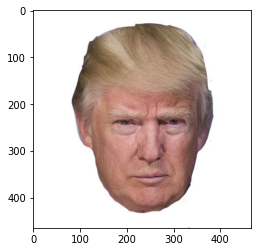

In [ ]:
plt.imshow(model.Indiv.image_contour.cpu())
plt.show()

On execute notre algorithme avec les paramètres suivant : 
- *2000* correspond au nombre total d'itérations
- *125* correspond à l'affichage du rendu toutes les *125* itérations

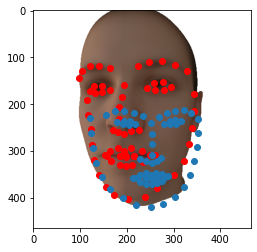

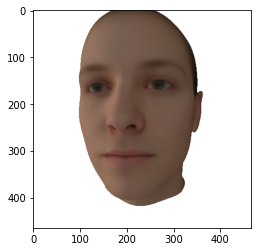

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


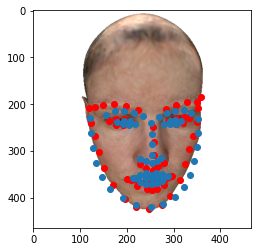

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


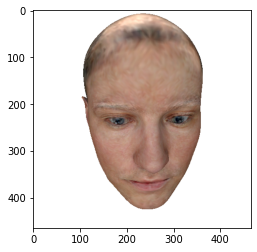

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


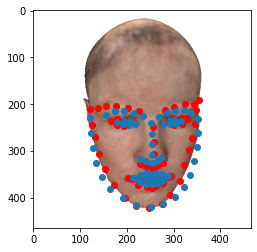

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


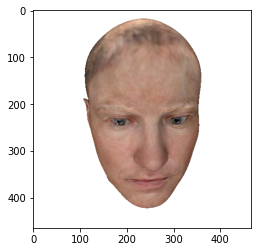

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


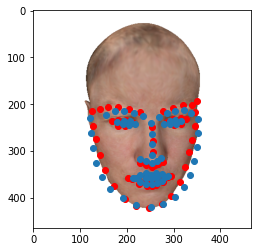

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


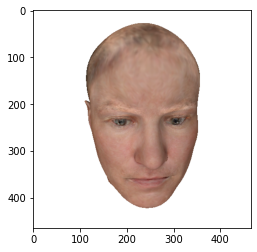

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


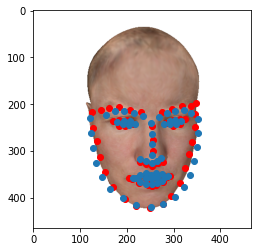

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


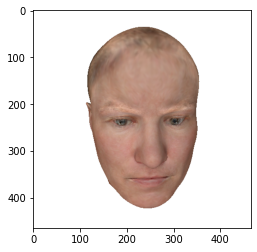

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


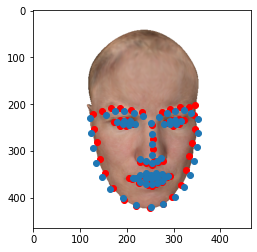

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


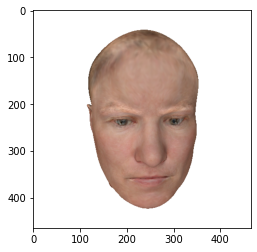

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


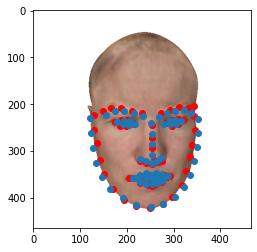

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


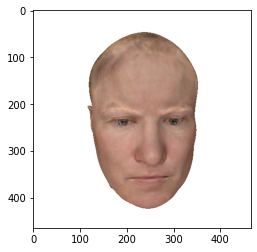

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


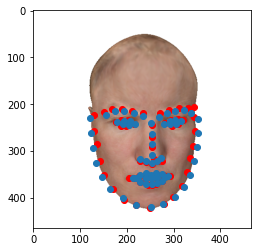

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


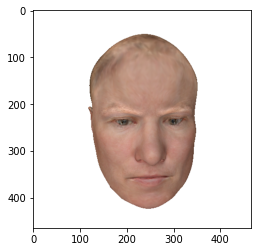

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


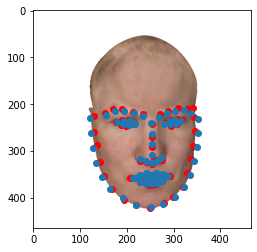

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


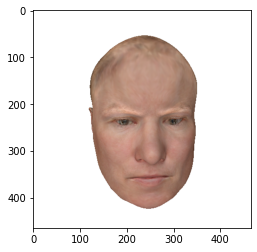

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


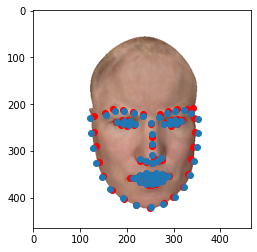

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


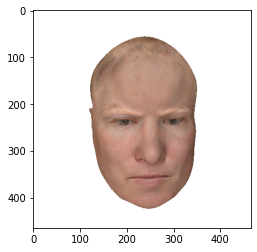

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


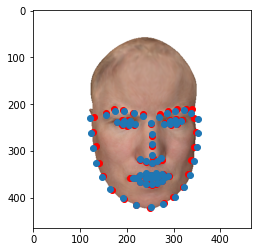

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


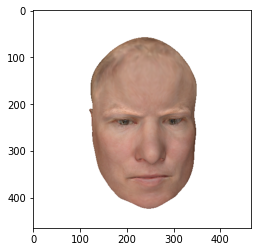

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


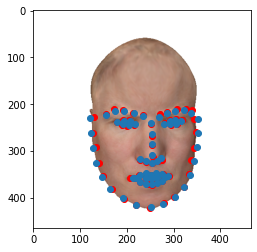

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


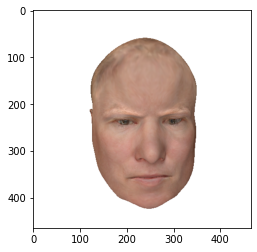

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


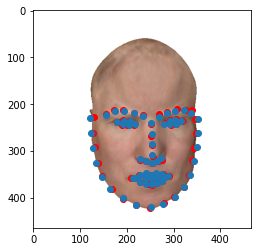

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


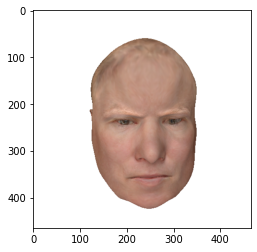

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


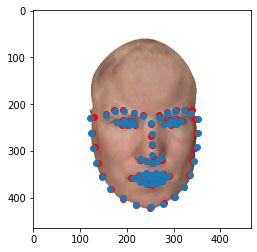

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


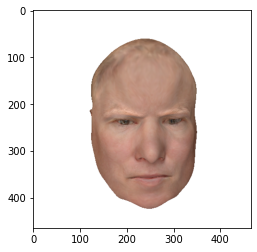

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


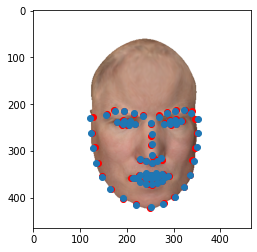

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


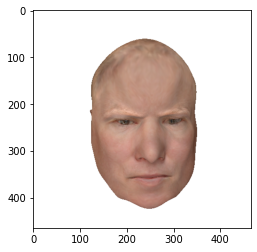

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


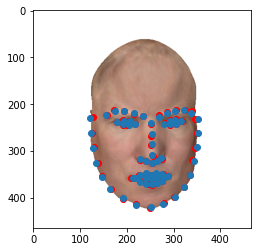

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


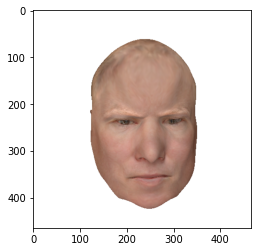

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


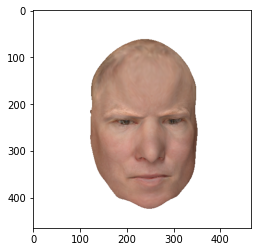

Fitting en :  128.34984731674194  secondes


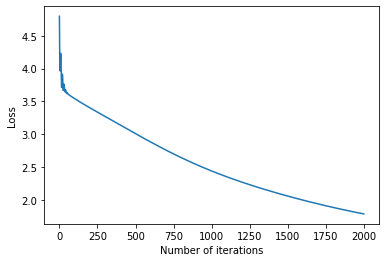

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
scheduler = StepLR(optimizer, step_size=1000, gamma=0.25)

optimization(model, optimizer, 2000, 125)

On peut aussi superposer notre modèle 3D et l'image initiale, en utilisant la méthode $superposition$ de la classe $Model$. Elle remplace chaque pixel blanc de l'image de rendu par un pixel de le photo de référence et renvoie le résultat.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


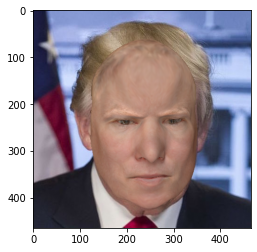

In [ ]:
plt.imshow(model.supperposition())
plt.show()

## Reconstruction d'un visage à partir de votre photo

Maintenant vous pouvez essayer d'executer l’algorithme sur votre photo. Pour l'executer le code ci-dessous, remplissez 
les variables $path\_image$ et $path\_contour$ avec des noms de votre photo et l'image de contour. 

Conseils pour essayer sur votre propre image : 
- Votre image doit être **CARRÉE** pour que l'algorithme fonctionne.
- Votre image doit être au format **.png**
- La taille de l'image ne doit pas être trop petite sinon le résultat ne sera pas bon, ni trop grande car sinon les temps de calculs seront grands. On recommande donc une image carrée entre **500x500** et **1000x1000** maximum. 
- On recommande aussi de faire le **détourage à la main** ou alors d'utiliser une image avec un **fond facilement distinguable du visage**, par exemple un fond uni. 
- Le détourage se doit d'être en **BLANC** et il faut éviter de couper les cheveux et le cou. L'exemple ci-dessous en est un exemple.  

In [ ]:
path_image = root + "Photos/Veronika.png"
path_contour = root + "Photos/Veronika_contour.png"

model = Model(n_shape=n_shape, n_color=n_color, path_model=path, 
              path_image=path_image, path_contour=path_contour, path_predictor=path_shape_pred)

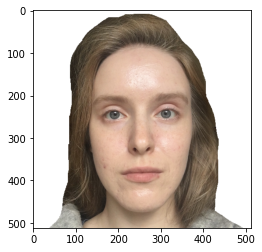

In [ ]:
plt.imshow(model.Indiv.image_contour.cpu())
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


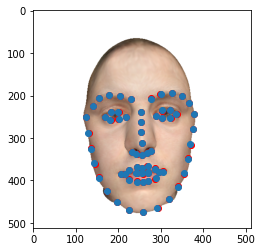

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


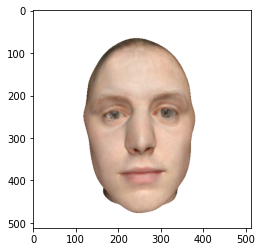

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


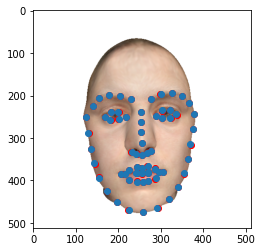

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


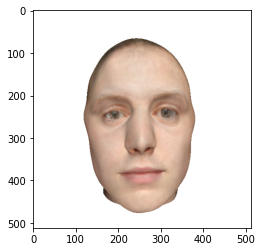

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


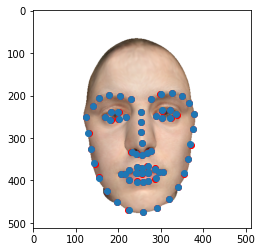

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


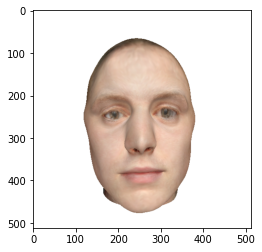

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


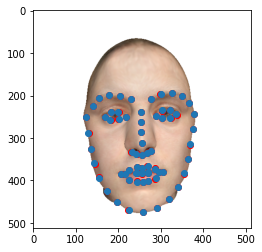

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


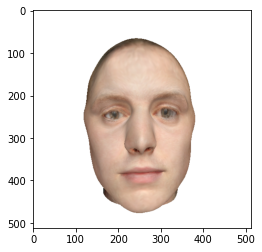

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


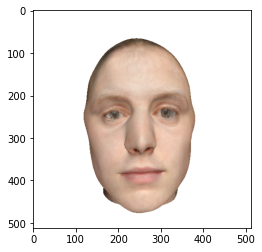

Fitting en :  33.56664276123047  secondes


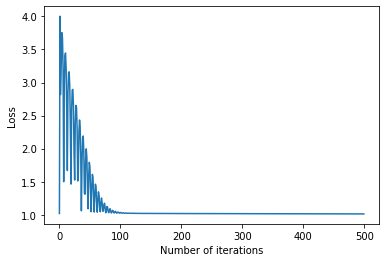

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
scheduler = StepLR(optimizer, step_size=1000, gamma=0.25)

optimization(model, optimizer, 4500, 125)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


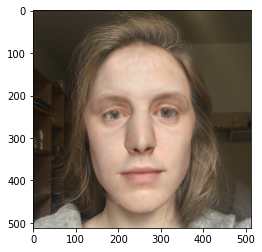

In [ ]:
plt.imshow(model.supperposition())
plt.show()

## Exemple avec 3 caméras

On donne un exemple de l'utilisation de l’algorithme de reconstruction cette fois avec 3 caméras.

In [ ]:
from FaceModel_3cam import FaceModel
from Rendu_3cam import Rendu
from Model_3cam import Model

In [ ]:
pathLeft1 = root + "Photos/Left.png"
pathMiddle1 = root + "Photos/Middle.png"
pathRight1 = root + "Photos/Right.png"

model = Model(n_shape=n_shape, n_color=n_color, path=path, 
              pathLeft1=pathLeft1, pathMiddle1=pathMiddle1, 
              pathRight1 = pathRight1, path7=path_shape_pred)

Les photos ci-dessous montrent que l'algorithme qui retire le fond n'est pas optimal. Néanmoins, nous arriverons tout de même à faire converger notre modèle. 

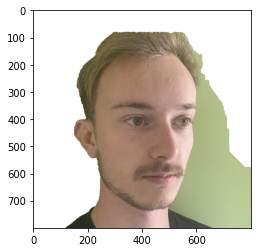

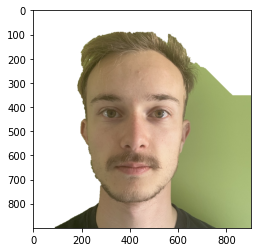

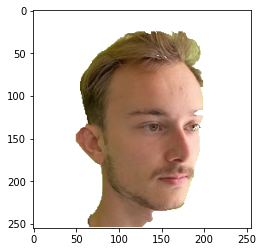

In [ ]:
plt.imshow(model.Indiv1.image_contour.cpu())
plt.show()
plt.imshow(model.Indiv2.image_contour.cpu())
plt.show()
plt.imshow(model.Indiv3.image_contour.cpu())
plt.show()

In [ ]:
def optimization(model, optimizer, scheduler, step, step_visu):
    start = time.time()
    loop = tqdm(range(step))
    losslist = []
    for i in loop:  
      optimizer.zero_grad()
      loss = model()
      loss.backward(retain_graph=True) 
      optimizer.step()
      scheduler.step()
      losslist.append(loss.detach())
      if i % step_visu == 0 and step_visu != -1 and i != 0:
        print("============")
        print(i)
        for index in range(1,4):
          model.render_visual(index)
          model.render(index)

    end = time.time()
    for index in range(1,4):
      model.render(index)

    model.losslist = losslist
    losslist = np.log10(np.array(losslist))
    plt.plot(range(len(losslist)), losslist)
    plt.xlabel("Nombre d'itérations")
    plt.ylabel("log10 de l'erreur")
    plt.title("Erreur en fonction du nombre d'itérations")
    plt.show()
    print("Fitting en : ",end - start," secondes")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


166


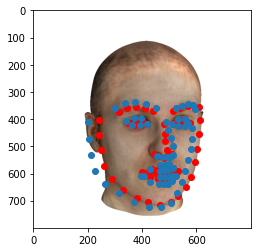

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


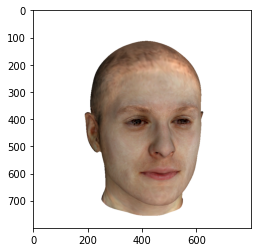

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


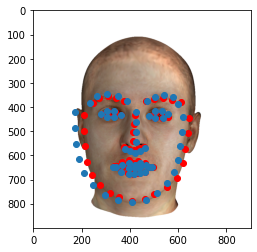

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


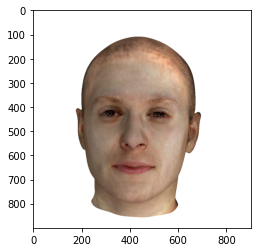

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


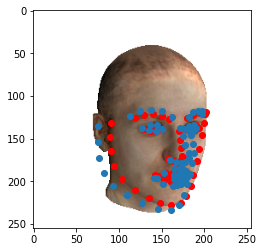

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


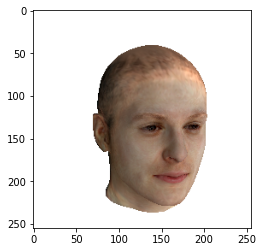

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


332


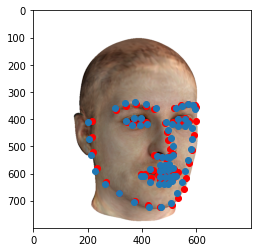

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


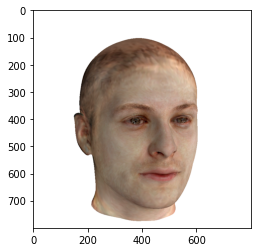

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


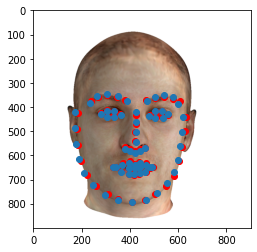

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


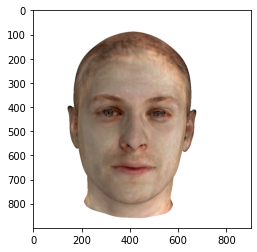

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


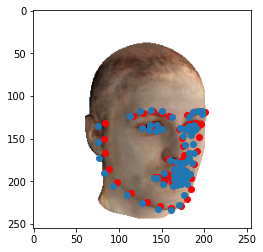

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


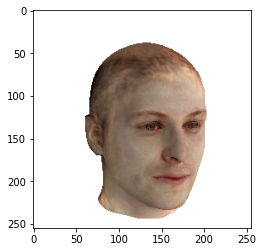

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


498


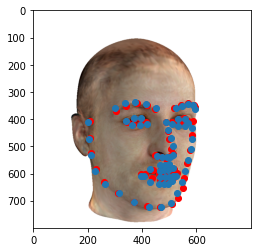

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


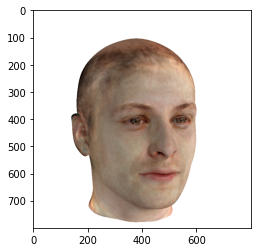

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


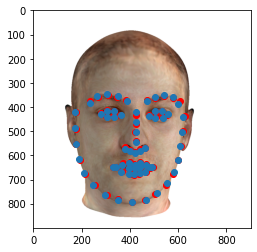

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


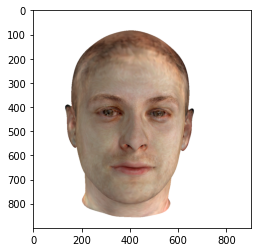

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


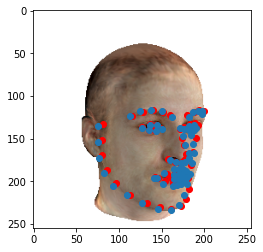

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


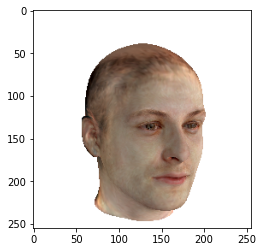

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


664


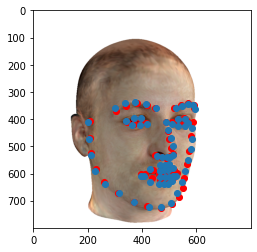

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


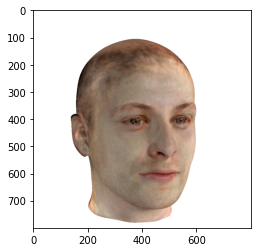

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


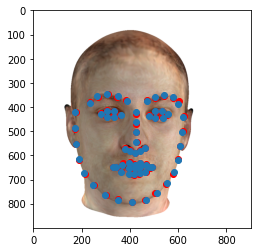

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


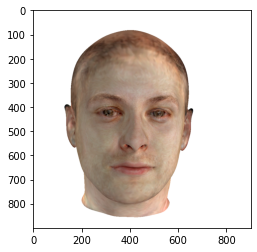

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


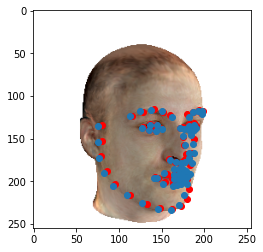

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


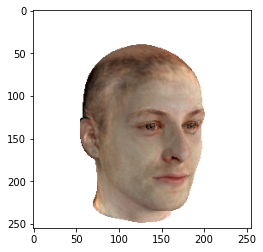

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


830


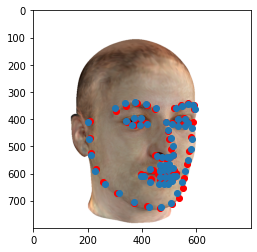

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


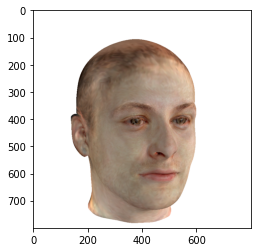

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


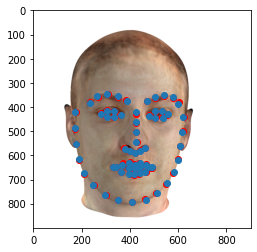

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


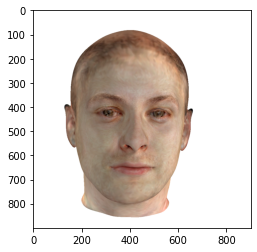

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


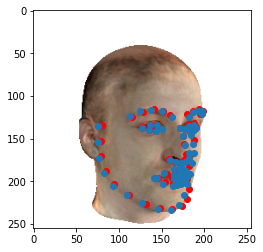

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


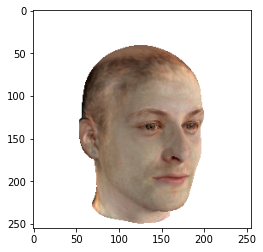

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


996


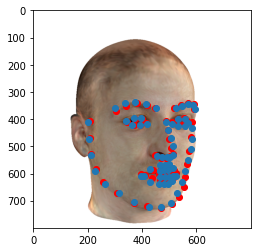

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


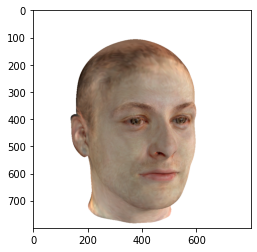

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


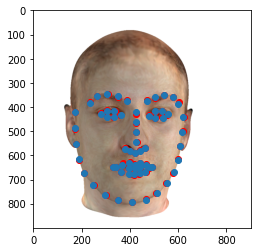

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


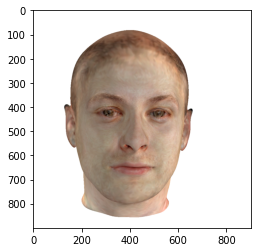

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


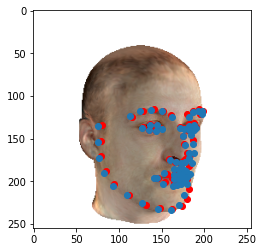

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


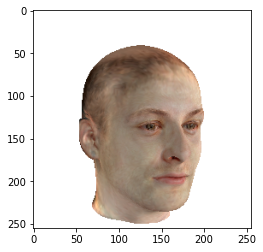

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


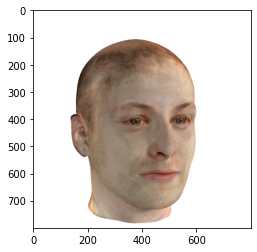

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


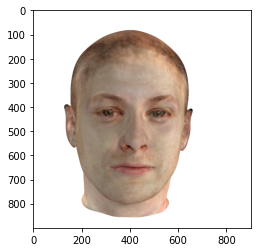

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


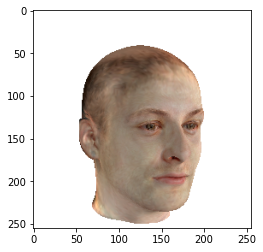

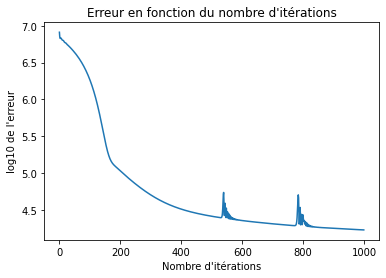

Fitting en :  296.16141533851624  secondes


In [ ]:
#Due à la mauvaise position des landmarks sur les photos de gauche et droite,
#nous sommes obligés de contraindre d'avantage les landmarks.
model.wlan = 100.
model.wc = 1.
model.wregc = 2.5E-5
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
scheduler = StepLR(optimizer, step_size=int(4000/3), gamma=0.25)

optimization(model, optimizer, scheduler, int(3000/3), int(500/3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


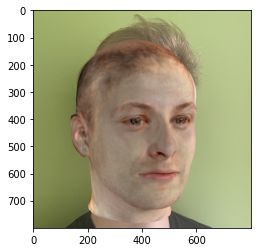

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


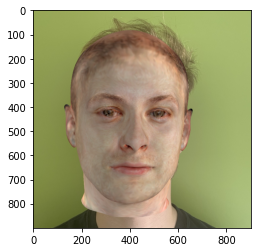

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


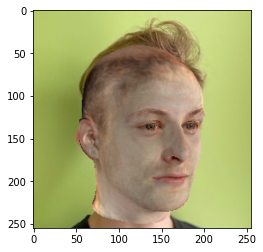

In [ ]:
for i in range(1,4):
  res = model.supperposition(i)
  plt.imshow(res)
  plt.show()